#### 1. 数据预处理

数据预处理任务：清洗数据，处理缺失值，提取用户浏览记录。首先我们读取数据集文件并创建一个空的数据框，而后解析数据集文件并提前用户联系记录：

In [10]:
import pandas as pd
data = pd.DataFrame(columns=['User1', 'User2'])

In [11]:
with open("./facebook_combined.txt","r") as f:
    lines = f.readlines()

for line in lines:
    line_split = line.replace("\n", "").replace("\r", "").split(' ')
    data = pd.concat([data, pd.DataFrame({'User1': [int(line_split[0])], 'User2': [int(line_split[1])]})], ignore_index=True)
    
data = data.dropna()
data

,User1,User2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


#### 2. 数据探索性分析
数据探索性分析任务：分析最常被访问的用户、用户访问量分布等。首先，我们可以计算每个用户的访问量，并找出最常使用的用户：

In [13]:
import matplotlib.pyplot as plt

# 计算每个用户的访问量
users_visits = data['User2'].value_counts()

# 找出最常被访问的用户
most_visited_users = users_visits.head(30)

# 打印最常被访问的用户
print("最常使用的用户：")
print(most_visited_users)

最常使用的用户：
User1
107     1043
1684     778
1912     748
3437     542
0        347
348      225
1941     215
1985     207
483      191
1917     189
1943     187
1983     185
1938     185
1993     183
1946     183
1962     179
2047     174
686      170
1086     168
1971     165
1984     164
2030     164
1979     164
925      163
1126     163
1966     163
2059     162
2078     162
2073     161
1577     161
Name: count, dtype: int64


接下来，我们可以绘制用户访问量的分布图：

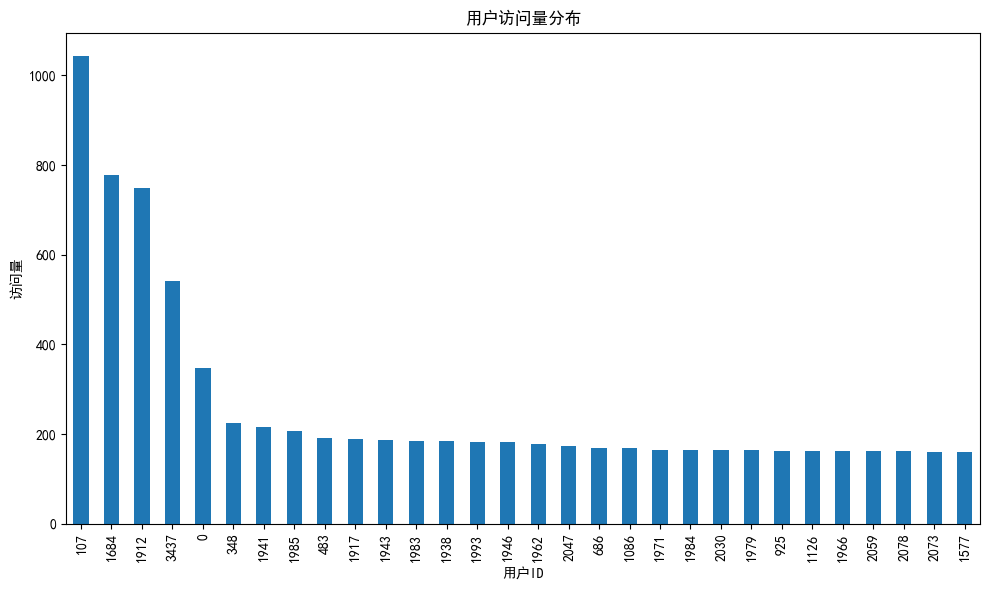

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文字体（示例为SimHei）

# 绘制页面访问量的分布图
plt.figure(figsize=(10, 6))
most_visited_users.plot(kind='bar')
plt.xlabel("用户ID")
plt.ylabel("访问量")
plt.title("用户访问量分布")
plt.tight_layout()  # 自动调整图像布局
plt.show()

#### 3.关联规则挖掘

关联规则挖取任务：使用Apriori算法或FP-growth算法，根据用户使用记录计算频繁项集和关联规则。关联规则挖掘是一种常用的数据挖掘技术，可以从数据集中发现项集之间的关联关系。 在这个任务中，我们将使用Apriori算法来计算频繁项集和关联规则。

In [15]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [17]:
# 将数据集转换成适合Apriori算法处理的形式
user_data = []
last_user = 0
tmp = []

for index, row in data.iterrows():
    user1_id = row['User1']
    user2_id = row['User2']
        
    if user1_id == last_user:
        tmp.append(user2_id)
    else:
        user_data.append(tmp)
        tmp = []
        tmp.append(user2_id)
    last_user = user1_id

user_data.append(tmp)
# user_data

te = TransactionEncoder()
data_encoded = te.fit_transform(user_data)
df = pd.DataFrame(data_encoded, columns=te.columns_)

df

,1,2,3,4,5,6,7,8,9,10,...,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3659,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,False,False,False,True
3660,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3661,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True


In [18]:
# 使用Apriori算法计算频繁项集
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# 打印频繁项集
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.058968,(1800)
1,0.050778,(1827)
2,0.068523,(1888)
3,0.067158,(2543)
4,0.053781,(2611)
5,0.051324,"(1888, 1800)"


In [19]:
# 根据频繁项集计算关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# 打印关联规则
print("\nAssociation Rules:")
# print(rules)
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1888),(1800),0.068523,0.058968,0.051324,0.749004,12.701859,0.047283,3.749191,0.989044
1,(1800),(1888),0.058968,0.068523,0.051324,0.870370,12.701859,0.047283,7.185679,0.979001


接下来我们对关联规则进行评价，使用Lift和卡方两个指标

In [20]:
# 计算提升度
rules['lift'] = rules['lift'].apply(lambda x: round(x, 2))

# 进行卡方检验
observed = rules['support'] * len(df)  # 观察到的频数
expected = rules['antecedent support'] * rules['consequent support'] * len(df)  # 期望频数
chi_squared = ((observed - expected) ** 2 / expected).sum()  # 计算卡方值

# 输出结果
print("关联规则提升度:")
print(rules[['antecedents', 'consequents', 'lift']])
print("\n卡方检验结果:")
print("卡方值:", chi_squared)

关联规则提升度:
  antecedents consequents  lift
0      (1888)      (1800)  12.7
1      (1800)      (1888)  12.7

卡方检验结果:
卡方值: 4053.5010359870907


#### 4. 结果评估

结果评估任务：计算关联规则的支持度、置信度和提升度，得出强关联规则。 关联规则的支持度、置信度和提升度分别如上述结果中"support"、"confidence"和"lift"列所表示。我们将置信度阈值设为0.5，提升度阈值设为1，可得出强联规则有：

关联规则: (1888) -> (1800)

置信度：0.749

提升度：12.7

关联规则: (1800) -> (1888)

置信度：0.870

提升度：12.7